In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carregar o arquivo GeoJSON
gdf = gpd.read_file('japan.geojson')

# Exibir os dados
print(gdf.head())

            nam nam_ja  id                                           geometry
0      Kyoto Fu    京都府  26  MULTIPOLYGON (((135.03670 35.53733, 135.03520 ...
1      Saga Ken    佐賀県  41  MULTIPOLYGON (((129.86220 33.58753, 129.85770 ...
2  Kumamoto Ken    熊本県  43  MULTIPOLYGON (((131.11040 33.18313, 131.11479 ...
3    Kagawa Ken    香川県  37  MULTIPOLYGON (((134.33200 34.56313, 134.33510 ...
4     Aichi Ken    愛知県  23  MULTIPOLYGON (((136.96091 35.41453, 136.96300 ...


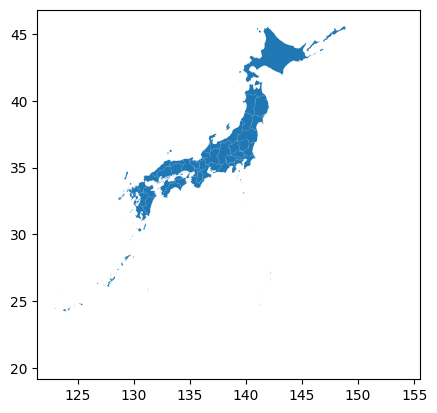

In [3]:
# Plotar o mapa
gdf.plot()
plt.show()

In [5]:
from shapely.geometry import shape
import matplotlib.pyplot as plt

# Função para converter geometrias
def convert_geometries(geojson_data):
    geometries = []
    for feature in geojson_data['features']:
        geometries.append(shape(feature['geometry']))
    return geometries

# Converter geometrias do GeoJSON
geometries = convert_geometries(gdf)

# Plotar as geometrias
fig, ax = plt.subplots(figsize=(10, 10))
for geom in geometries:
    x, y = geom.exterior.xy if geom.geom_type == 'Polygon' else zip(*[(g.exterior.xy) for g in geom.geoms])
    ax.plot(x, y, color='blue')

ax.set_title('Geographical Map of Japan')
plt.show()

KeyError: 'features'

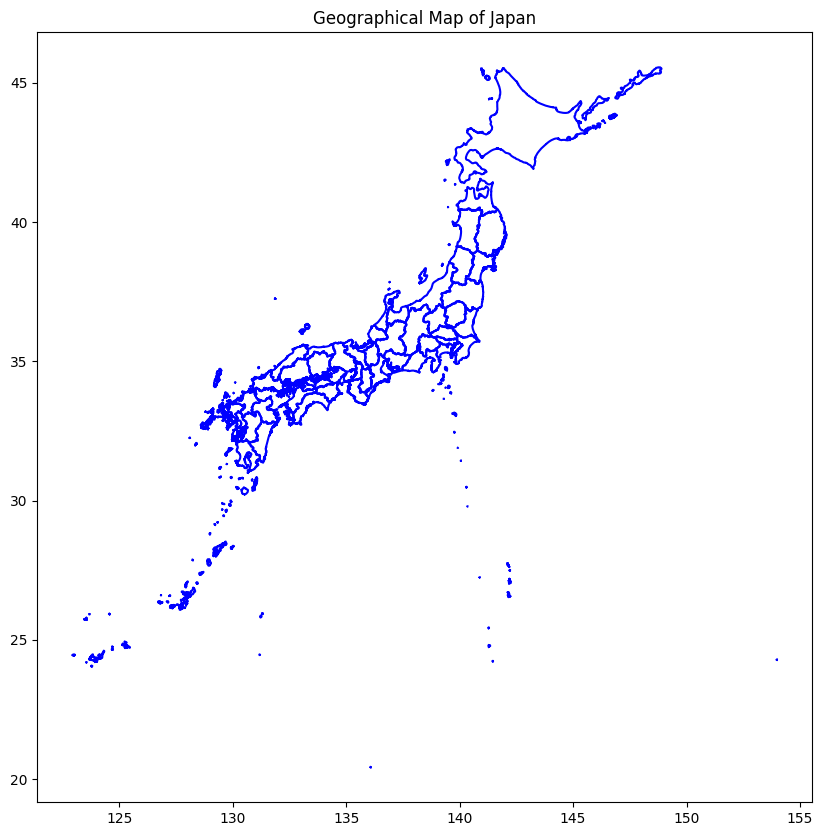

In [6]:
from shapely.geometry import shape, Polygon, MultiPolygon
import json
import matplotlib.pyplot as plt

# Função para converter geometrias do GeoJSON para Shapely
def convert_geometries(geojson_data):
    geometries = []
    for feature in geojson_data['features']:
        geometries.append(shape(feature['geometry']))
    return geometries

# Carregar o arquivo GeoJSON
file_path = 'japan.geojson'
with open(file_path, 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

# Converter geometrias
geometries = convert_geometries(geojson_data)

# Plotar as geometrias
fig, ax = plt.subplots(figsize=(10, 10))
for geom in geometries:
    if isinstance(geom, Polygon):
        x, y = geom.exterior.xy
        ax.plot(x, y, color='blue')
    elif isinstance(geom, MultiPolygon):
        for poly in geom.geoms:
            x, y = poly.exterior.xy
            ax.plot(x, y, color='blue')

ax.set_title('Geographical Map of Japan')
plt.show()

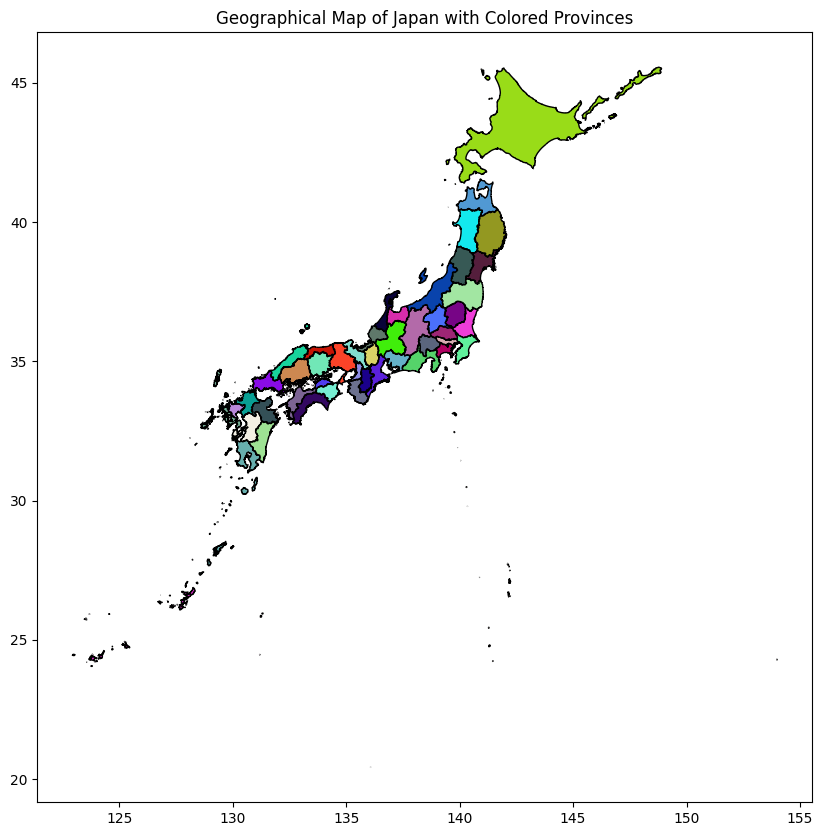

In [7]:
from shapely.geometry import shape, Polygon, MultiPolygon
import json
import matplotlib.pyplot as plt
import random

# Função para converter geometrias do GeoJSON para Shapely
def convert_geometries(geojson_data):
    geometries = []
    for feature in geojson_data['features']:
        geometries.append(shape(feature['geometry']))
    return geometries

# Função para gerar cores aleatórias
def generate_random_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

# Carregar o arquivo GeoJSON
file_path = 'japan.geojson'
with open(file_path, 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

# Converter geometrias
geometries = convert_geometries(geojson_data)

# Atribuir cores às províncias
colors = [generate_random_color() for _ in geometries]

# Plotar as geometrias com cores diferentes
fig, ax = plt.subplots(figsize=(10, 10))
for geom, color in zip(geometries, colors):
    if isinstance(geom, Polygon):
        x, y = geom.exterior.xy
        ax.fill(x, y, color=color, edgecolor='k')
    elif isinstance(geom, MultiPolygon):
        for poly in geom.geoms:
            x, y = poly.exterior.xy
            ax.fill(x, y, color=color, edgecolor='k')

ax.set_title('Geographical Map of Japan with Colored Provinces')
plt.show()

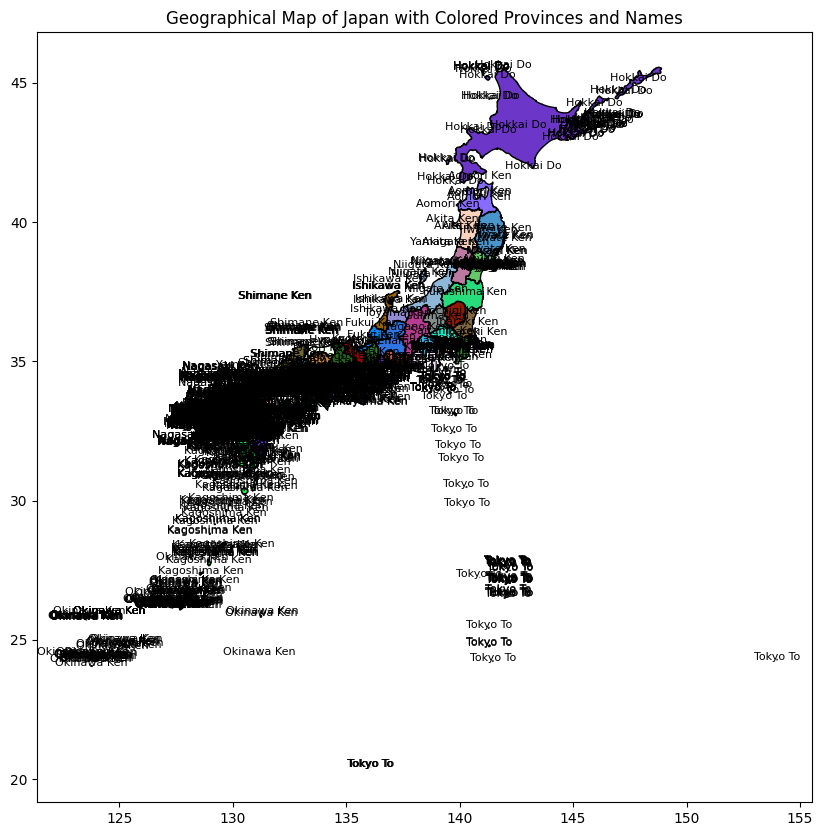

In [18]:
from shapely.geometry import shape, Polygon, MultiPolygon
import json
import matplotlib.pyplot as plt
import random

# Função para converter geometrias do GeoJSON para Shapely
def convert_geometries(geojson_data):
    geometries = []
    names = []
    for feature in geojson_data['features']:
        geometries.append(shape(feature['geometry']))
        names.append(feature['properties']['nam'])  # Supondo que o nome da província esteja na propriedade 'name'
    return geometries, names

# Função para gerar cores aleatórias
def generate_random_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

# Carregar o arquivo GeoJSON
file_path = 'japan.geojson'
with open(file_path, 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

# Converter geometrias e obter nomes
geometries, names = convert_geometries(geojson_data)

# Atribuir cores às províncias
colors = [generate_random_color() for _ in geometries]

# Plotar as geometrias com cores diferentes e adicionar os nomes
fig, ax = plt.subplots(figsize=(10, 10))
for geom, color, name in zip(geometries, colors, names):
    if isinstance(geom, Polygon):
        x, y = geom.exterior.xy
        ax.fill(x, y, color=color, edgecolor='k')
        # Adicionar o nome no centro do polígono
        centroid = geom.centroid
        ax.text(centroid.x, centroid.y, name, fontsize=8, ha='center')
    elif isinstance(geom, MultiPolygon):
        for poly in geom.geoms:
            x, y = poly.exterior.xy
            ax.fill(x, y, color=color, edgecolor='k')
            # Adicionar o nome no centro do polígono
            centroid = poly.centroid
            ax.text(centroid.x, centroid.y, name, fontsize=8, ha='center')

ax.set_title('Geographical Map of Japan with Colored Provinces and Names')
plt.show()

In [19]:
# Carregar o arquivo GeoJSON
file_path = 'japan.geojson'
with open(file_path, 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

In [20]:
geojson_data['features'][0]['properties']['nam']

'Kyoto Fu'

In [21]:
for feature in geojson_data['features']:
    print(feature['properties']['nam'])

Kyoto Fu
Saga Ken
Kumamoto Ken
Kagawa Ken
Aichi Ken
Tochigi Ken
Yamanashi Ken
Shiga Ken
Gunma Ken
Miyagi Ken
Shizuoka Ken
Ibaraki Ken
Okinawa Ken
Yamagata Ken
Wakayama Ken
Nagasaki Ken
Akita Ken
Okayama Ken
Fukuoka Ken
Gifu Ken
Aomori Ken
Osaka Fu
Nagano Ken
Oita Ken
Mie Ken
Hiroshima Ken
Hokkai Do
Hyogo Ken
Chiba Ken
Toyama Ken
Tokyo To
Saitama Ken
Yamaguchi Ken
Fukushima Ken
Ishikawa Ken
Fukui Ken
Ehime Ken
Nara Ken
Shimane Ken
Iwate Ken
Tottori Ken
Tokushima Ken
Kagoshima Ken
Niigata Ken
Kochi Ken
Miyazaki Ken
Kanagawa Ken
